# CUADERNO EVALUACION DEL MODELO

# Indice

1. [Parametros para evaluar el modelo en clasification ](#Parametros-para-evaluar-el-modelo-en-clasification)
2. [Cargar el modelo con Pickel](#Cargar-el-modelo-con-Pickel)
3. [Metricas](#Metricas)
4. [](#)
5. [](#)
6. [](#)


### Parametros para evaluar el modelo en clasification 

[indice](#Indice)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, accuracy_score
import pickle
import os
from sklearn.metrics import make_scorer, recall_score, confusion_matrix,accuracy_score,precision_score, multilabel_confusion_matrix, f1_score,roc_auc_score,roc_curve


### Cargar el modelo con Pickel


[indice](#Indice)

In [2]:
ruta_modelo = os.path.abspath(os.path.join('..','models','trained_model.pkl'))

with open(ruta_modelo, "rb") as archivo:
   modelo =  pickle.load(archivo)

In [3]:
modelo

GradientBoostingClassifier(random_state=0)

In [8]:
Test = pd.read_csv("../data/Test.csv")

X_test = Test[['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']]
y_test = Test['class']

In [40]:
y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7286300858529302


In [39]:
predictions = modelo.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7286300858529302


In [41]:
acierto = accuracy_score(y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 72.86 %
Error: 27.14 %


In [43]:
c_matrix = 
print(c_matrix)

[[591  89   3   2]
 [140 406  90  26]
 [ 65 139 411  35]
 [  9  48  81 544]]


669.75

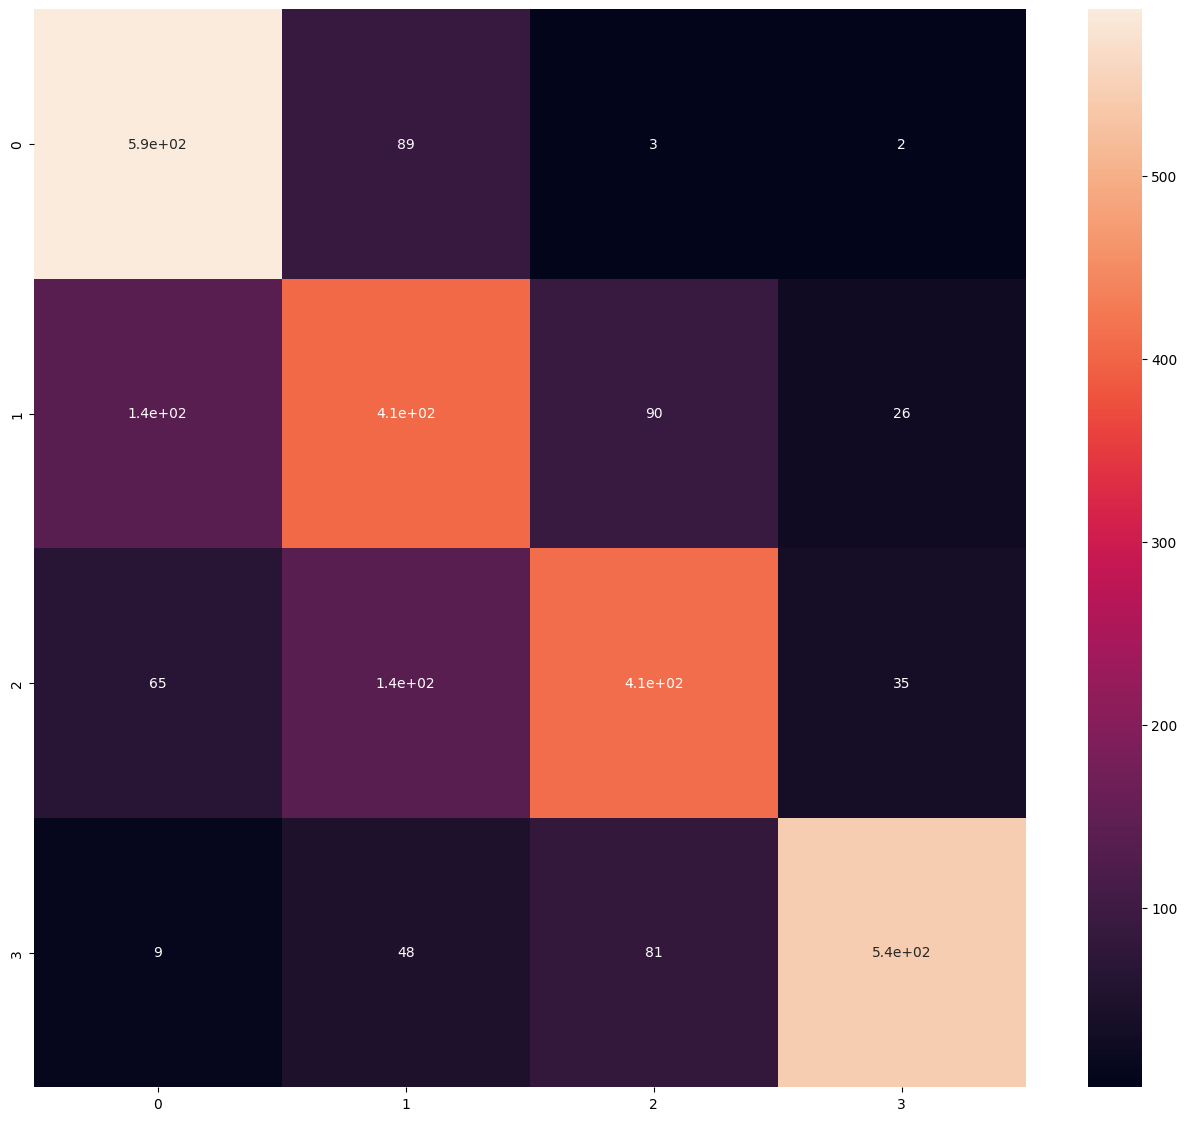

In [52]:
import seaborn as sns
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

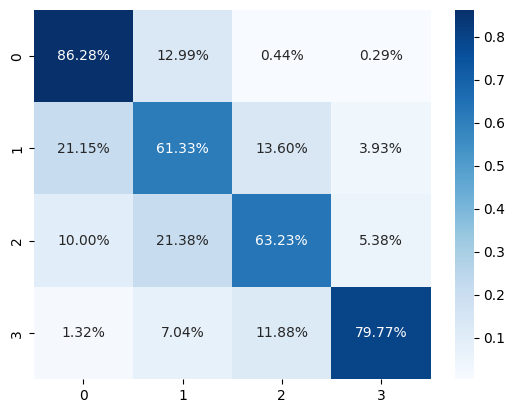

In [46]:
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

### Metricas

[indice](#Indice)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
# print("Sensibilidad :",recall_score(y_test, y_pred))
# print("Precisión :",precision_score(y_test, y_pred))
print("Exactitud:",accuracy_score(y_test,y_pred))
# print("F1 Score", f1_score(y_test,y_pred))
print("Matriz de Confusion", multilabel_confusion_matrix(y_test,y_pred))
print("Curva Roc", roc_curve(y_test,y_pred,multi_class='ovo'))
# print("Area bajo la curva roc", roc_auc_score(y_test,y_pred, multi_class='ovo'))


Exactitud: 0.7286300858529302
Matriz de Confusion [[[1780  214]
  [  94  591]]

 [[1741  276]
  [ 256  406]]

 [[1855  174]
  [ 239  411]]

 [[1934   63]
  [ 138  544]]]


TypeError: roc_curve() got an unexpected keyword argument 'multi_class'

In [27]:
print("Matriz de Confusion", multilabel_confusion_matrix(y_test,y_pred))

Matriz de Confusion [[[1780  214]
  [  94  591]]

 [[1741  276]
  [ 256  406]]

 [[1855  174]
  [ 239  411]]

 [[1934   63]
  [ 138  544]]]


In [31]:
sns.heatmap(modelo.multilabel_confusion_matrix(y_test,y_pred), annot=True)

AttributeError: 'GradientBoostingClassifier' object has no attribute 'multilabel_confusion_matrix'